In [ ]:
# Run this cell and upload the downloaded dataset("resume_dataset2.csv") or custom one
# in every session or just run the below cell for just the Kaggle Dataset

from google.colab import files
files.upload()

#Loading the dataset
<ol>
  <li>First the csv file is downloaded</li>
  <li>Necessary libraries are then imported</li>
  <li>Then the file is loaded in a pandas dataframe</li>
</ol>

In [ ]:
# Downloading the csv file(The Kaggle one) from a link to use it
import requests
file_url = "https://drive.google.com/uc?id=1p-mqOCwescBeCctMMf9GJusBINjsXJRA&export=download"
req = requests.get(file_url)
csv_file = open('resume_dataset2.csv', 'wb')
csv_file.write(req.content)
csv_file.close()

In [ ]:
# Installing scikit-multilearn
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 3.0MB/s 


In [ ]:
# Necessary Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [ ]:
# Creating DataFrame and checking out first 5 and last 5 values
df = pd.read_csv("resume_dataset2.csv")
display(df.head())
display(df.tail())

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [ ]:
# Let's check how many resumes are there in each category of job roles
display(df.groupby('Category').count())

# Checking for null values
display(df[df.isnull().any(axis=1)])

,Resume
Category,
Advocate,20
Arts,36
Automation Testing,26
Blockchain,40
Business Analyst,28
Civil Engineer,24
Data Science,40
Database,33
DevOps Engineer,55


,Category,Resume


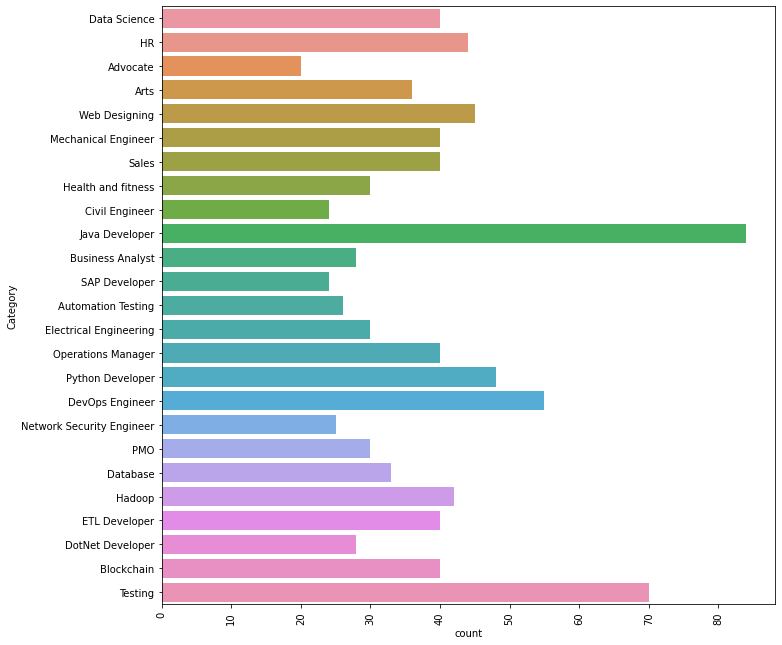

In [ ]:
import seaborn as sns
plt.figure(figsize=(11, 11))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df)

In [ ]:
# Some Data Cleaning, before model making.
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

df['resume_clean'] = df.Resume.apply(lambda x: cleanResume(x))
print(df.resume_clean[10])

Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the r

In [ ]:
df_new[df_new['Category_encoded'] == 15]

In [ ]:
text = "Full Stack Developer, Machine Learning Enthusiast, and Always Looking for Opportunities to Grab and Learn from it! SKILLS PROGRAMMING SKILLS:  Javascript(Advanced),  C(Intermediate),   Java(Intermediate),    Python(Intermediate) Industry Knowledge:   Backend Development,   Machine Learning, ❖ TOOLS I USE:   Git   Node.js,   Postman,   Anaconda,   HTML,   CSS,   Visual Studio Code DATABASE SKILLS:   MongoDB  OTHER SKILLS:   Linux,   Data Structure,   Algorithms,   Linear Algebra,   Quick Learning,   Collaborative working LANGUAGES English, Bengali, Hindi EDUCATION Kalyani Government Engineering College, Kalyani, Nadia— B.Tech. in Computer Science and Engineering July 2018 - June 2022(Expected) Appeared in WBJEE exam and received a rank of 1619 for which got admission in the branch of Computer Science and Engineering. Labanhrad Vidyapith, Saltlake, Kolkata— 10th and 12th January 2009 - April 2017 Grabbed the top and 2nd position in the 10th and 12th examination respectively(State level examination)  in the school. EXPERIENCE GreyKarma Technologies, Kolkata — Backend Developer June 2020 - January 2021 Developed the backend server with NoSQL database for the implementation of NLP algorithms, for multiple data curation related tasks and providing the data through various API’s. ACHIEVEMENTS 2nd Position in Annual Tech Fest of College for building a special communication tool by using only visible light."
#text2 = "I am a Data Sciencetist, machine learning engineer, good worker, collaborative working, algorithms"
text = cleanResume(text)
data = {"resume_clean": [text]}
df_test = pd.DataFrame(data)

In [ ]:
# Initializing the Tfidf Vectorizer and fitting the training data
tfidf_one = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_one.fit(df['resume_clean'])


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
print ("CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS")

CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS


In [ ]:
df.head()

,Category,Resume,resume_clean
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
resumeText = df['resume_clean'].values
resumeTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(resumeText)
WordFeatures = word_vectorizer.transform(resumeText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,resumeTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 1500)
(193, 1500)


In [ ]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, classification_report(y_test, prediction)))
#print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
         

In [ ]:
clf1 = OneVsRestClassifier(MultinomialNB()).fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf1.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf1.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (clf1, classification_report(y_test, prediction)))

Accuracy of MultinomialNB Classifier on training set: 0.99
Accuracy of MultinomialNB Classifier on test set: 0.97

 Classification report for classifier OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1